# Read the data
## 2m-temp_annual_reduction data

In [1]:
import h5py
import numpy as np

filename = r"C:\SUSTech\datasets_of_graduation_project\hetero_outputs\data_2mtemp_annual_reduction.h5"

with h5py.File(filename, 'r') as f:
    ALPHAS = f['alphas'][:]
    YEARS = f['years'][:]
    LATS = f['latitudes'][:]
    LONS = f['longitudes'][:]
    DATA_2MTEMP_ANNUAL_REDUCTION = f['data_2mtemp_annual_reduction'][:]
    
print("The shape of DATA_2MTEMP_ANNUAL_REDUCTION is: (len(ALPHAS), len(YEARS), len(LATS), len(LONS)) =", DATA_2MTEMP_ANNUAL_REDUCTION.shape)

The shape of DATA_2MTEMP_ANNUAL_REDUCTION is: (len(ALPHAS), len(YEARS), len(LATS), len(LONS)) = (5, 80, 60, 144)


## 2m-temp_annual_reduction_MA data
"MA" is for "moving average". 

In [30]:
filename_MA = r"C:\SUSTech\datasets_of_graduation_project\hetero_outputs\data_2mtemp_annual_reduction_MA.h5"

with h5py.File(filename_MA, 'r') as f:
    # ALPHAS_MA = f['alphas'][:] # ALPHAS_MA is the same as ALPHAS
    YEARS_MA = f['years'][:]
    # LATS_MA = f['latitudes'][:] # LATS_MA is the same as LATS
    # LONS_MA = f['longitudes'][:] # LONS_MA is the same as LONS
    DATA_2MTEMP_ANNUAL_REDUCTION_MA = f['data_2mtemp_annual_reduction_ma'][:]
    WINDOW_SIZE = f['window_size'][()]
    
print("The shape of DATA_2MTEMP_ANNUAL_REDUCTION_MA is: (len(ALPHAS), len(YEARS), len(LATS), len(LONS)) =", DATA_2MTEMP_ANNUAL_REDUCTION_MA.shape)

The shape of DATA_2MTEMP_ANNUAL_REDUCTION_MA is: (len(ALPHAS), len(YEARS), len(LATS), len(LONS)) = (5, 71, 60, 144)


## Representative-latlon data

In [6]:
import pandas as pd

rprsnttvs = pd.read_excel(r"C:\SUSTech\datasets_of_graduation_project\rprsnttvs.xlsx")
rprsnttvs.head()

,lat,lon,region,place_char
0,82.0,-145.0,AO,H
1,90.0,0.0,AO,H
2,80.0,15.0,AO,N
3,81.0,57.5,AO,C
4,76.0,-57.5,GI,C


In [7]:
rprsnttvs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lat         41 non-null     float64
 1   lon         41 non-null     float64
 2   region      41 non-null     object 
 3   place_char  41 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.4+ KB


The fields "region" and "place_char" are described as:
+ `region`: 
    - `AO` = Arctic Ocean
    - `GI` = Greenland-Iceland
    - `NENA` = North-East North America
    - `NWNA` = North-West North America
    - `NE` = North Europe
    - `RA` = Russian Arctic
+ `place_char`: 
    - `I` = Inland (inside the continent and far from the sea)
    - `C` = Coastal (on land but close to the sea)
    - `N` = Near shore (in the sea but close to land)
    - `H` = High sea (in the sea and far from land)

# Compare the non-MA and MA data

In [34]:
# The latlon axes of the data
LATS, LONS

(array([90.  , 89.5 , 89.  , 88.5 , 88.  , 87.5 , 87.  , 86.5 , 86.  ,
        85.5 , 85.  , 84.5 , 84.  , 83.5 , 83.  , 82.5 , 82.  , 81.5 ,
        81.  , 80.5 , 80.  , 79.5 , 79.  , 78.5 , 78.  , 77.5 , 77.  ,
        76.5 , 76.  , 75.5 , 74.75, 74.25, 73.75, 73.25, 72.75, 72.25,
        71.75, 71.25, 70.75, 70.25, 69.75, 69.25, 68.75, 68.25, 67.75,
        67.25, 66.75, 66.25, 65.75, 65.25, 64.75, 64.25, 63.75, 63.25,
        62.75, 62.25, 61.75, 61.25, 60.75, 60.  ]),
 array([-180.  , -177.5 , -175.  , -172.5 , -170.  , -167.5 , -165.  ,
        -162.5 , -160.  , -157.5 , -155.  , -152.5 , -150.  , -147.5 ,
        -145.  , -142.5 , -139.75, -137.25, -134.75, -132.25, -129.75,
        -127.25, -124.75, -122.25, -119.75, -117.25, -114.75, -112.25,
        -109.75, -107.25, -104.75, -102.25,  -99.5 ,  -97.  ,  -94.5 ,
         -92.  ,  -89.5 ,  -87.  ,  -84.5 ,  -82.  ,  -79.5 ,  -77.  ,
         -74.5 ,  -72.  ,  -69.5 ,  -67.  ,  -64.5 ,  -62.  ,  -59.25,
         -56.75,  -54.25,

In [52]:
def get_latlon_indices(lat, lon):
    lat_idx = int(np.floor((90 - lat) / 0.5))
    lon_idx = int(np.floor((lon - (-180)) / 2.5))
    
    # out of range check
    if lat_idx >= len(LATS): lat_idx -= 1
    if lon_idx >= len(LONS): lon_idx -= 1
    return lat_idx, lon_idx

In [36]:
rprsnttvs

,lat,lon,region,place_char
0,82.0,-145.0,AO,H
1,90.0,0.0,AO,H
2,80.0,15.0,AO,N
3,81.0,57.5,AO,C
4,76.0,-57.5,GI,C
5,63.5,-42.5,GI,C
6,75.0,-22.5,GI,C
7,82.5,-47.5,GI,C
8,72.5,-37.5,GI,I
9,68.0,-50.0,GI,C


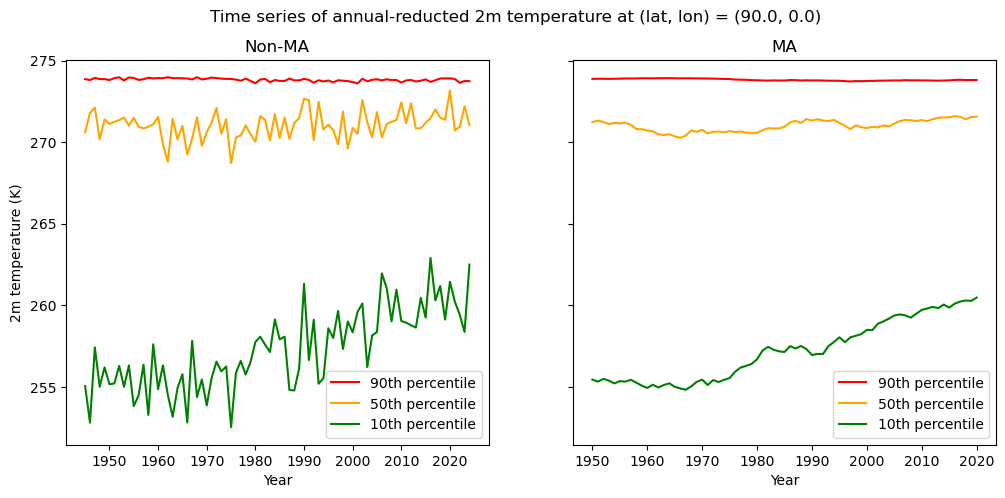

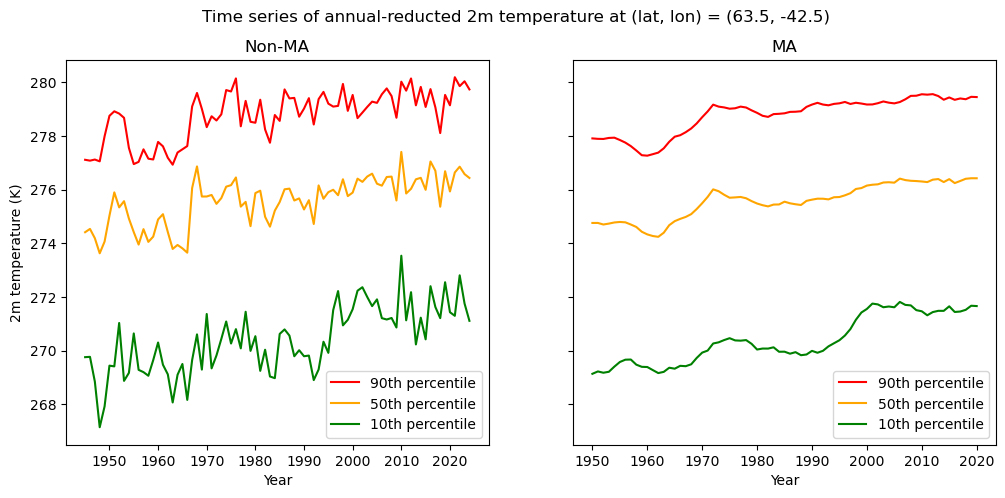

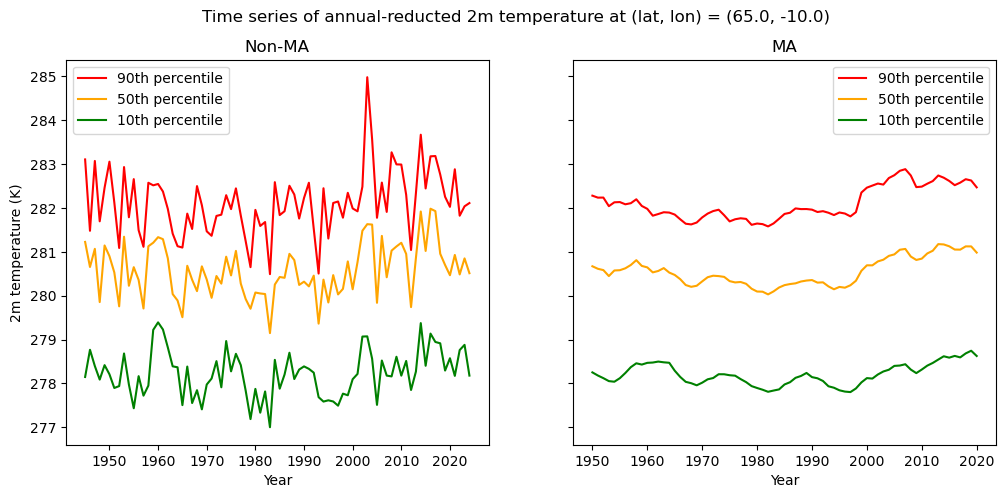

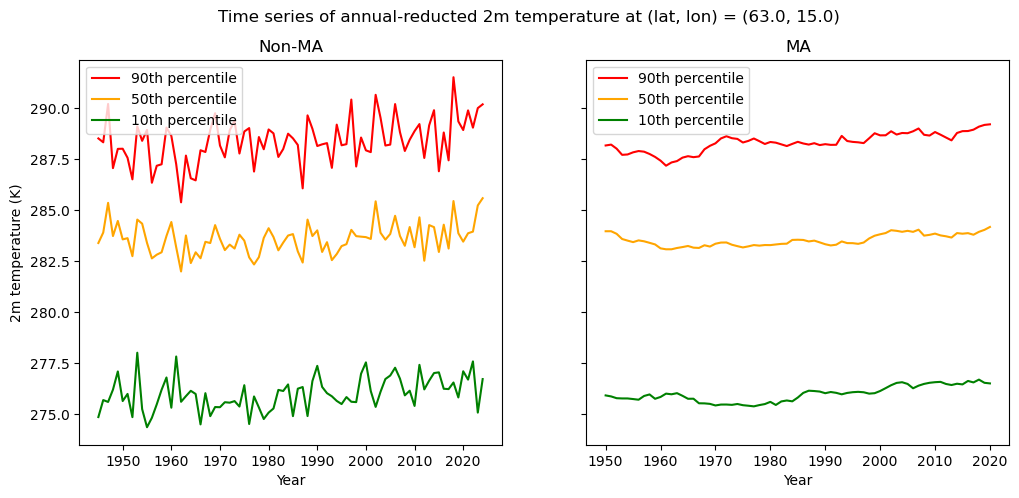

In [ ]:
latlons_for_nonMA_vs_MA = [1, 5, 17, 33] # the i-th point in rprsnttvs, chosen arbitrarily

import matplotlib.pyplot as plt


for point in latlons_for_nonMA_vs_MA:
    
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
    lat, lon = rprsnttvs.iloc[point][['lat', 'lon']].values
    fig.suptitle("Time series of annual-reducted 2m temperature at (lat, lon) = ({}, {})".format(lat, lon))
    ax[0].set_title("Non-MA")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("2m temperature (K)")
    ax[1].set_title("MA")
    ax[1].set_xlabel("Year")
    # ax[1].set_ylabel("2m temperature (K)")
    
    lat_idx, lon_idx = get_latlon_indices(lat, lon)
    alphas = ALPHAS[[0,2,4]] # only take the 90th, 50th and 10th percentiles
    alpha_colors = ['red', 'orange', 'green']
    
    # plot the nonMA data
    for alpha_idx, alpha in enumerate(alphas):
        ts_nonMA_alpha = DATA_2MTEMP_ANNUAL_REDUCTION[alpha_idx, :, lat_idx, lon_idx]
        ax[0].plot(YEARS, ts_nonMA_alpha, label="{}th percentile".format(alpha), color=alpha_colors[alpha_idx])
        ax[0].legend()
        
    # plot the MA data
    for alpha_idx, alpha in enumerate(alphas):
        ts_MA_alpha = DATA_2MTEMP_ANNUAL_REDUCTION_MA[alpha_idx, :, lat_idx, lon_idx]
        ax[1].plot(YEARS_MA, ts_MA_alpha, label="{}th percentile".format(alpha), color=alpha_colors[alpha_idx])
        ax[1].legend()
        
    plt.show()
    fig.savefig(r"C:\SUSTech\datasets_of_graduation_project\hetero_outputs\fig_outputs\nonMA_vs_MA\latlon_{}_{}.png".format(lat, lon), dpi=300)


Obviously, the MA smoothes the data, which requires us to focus more on the MA data than the non-MA data later.

# Visualize the data (ts0a)
## Group by region

In [50]:
rprsnttvs_groupby_region = rprsnttvs.groupby('region')
rprsnttvs_groupby_region.get_group("AO").head()

,lat,lon,region,place_char
0,82.0,-145.0,AO,H
1,90.0,0.0,AO,H
2,80.0,15.0,AO,N
3,81.0,57.5,AO,C


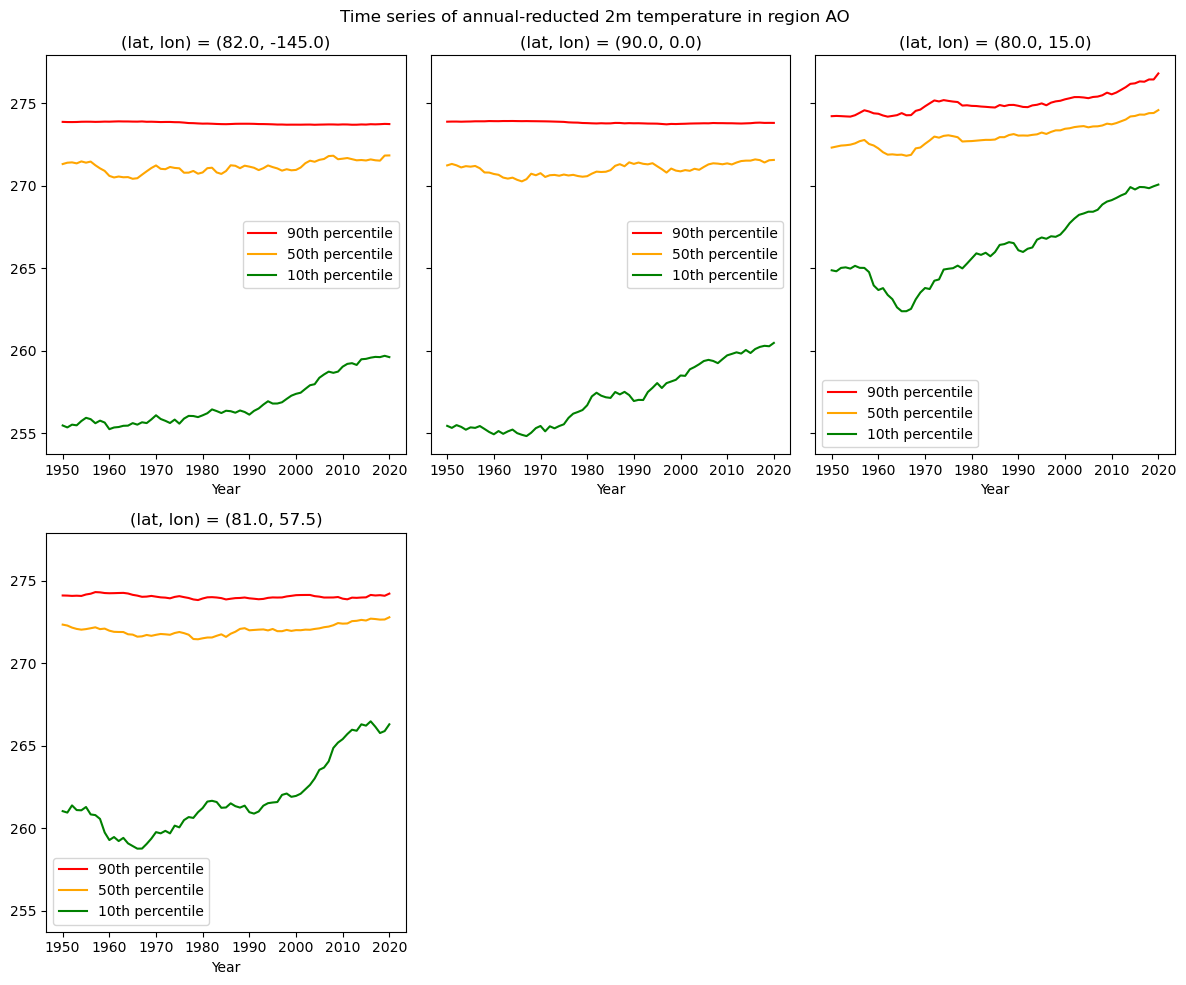

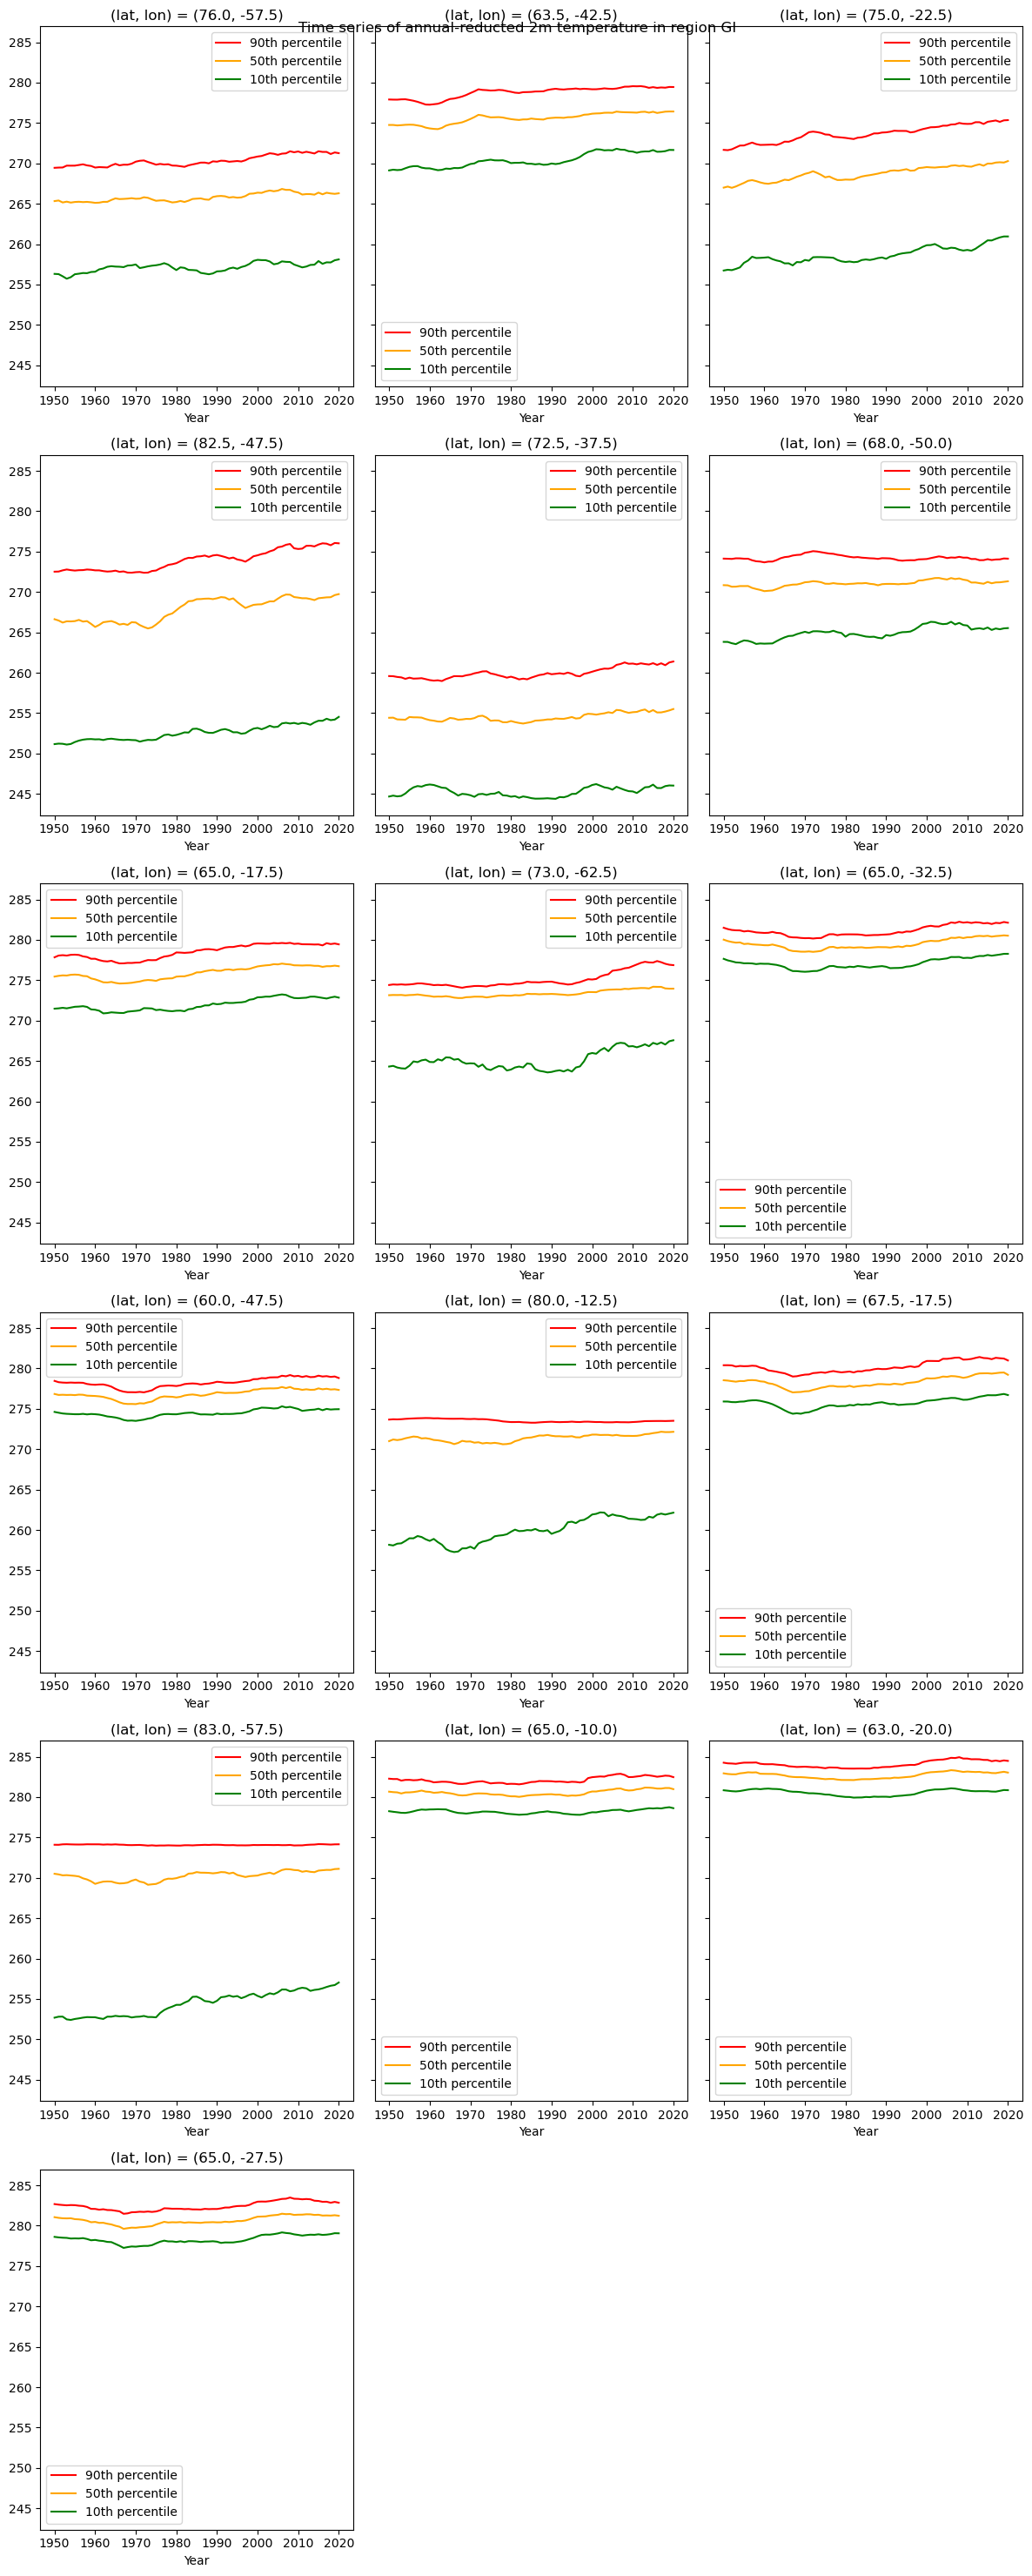

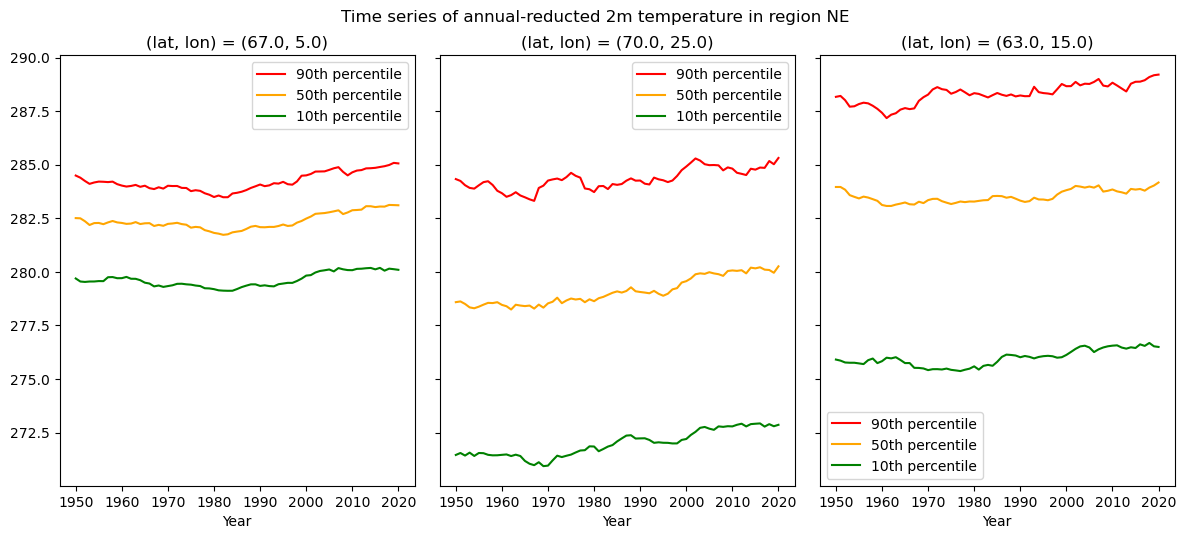

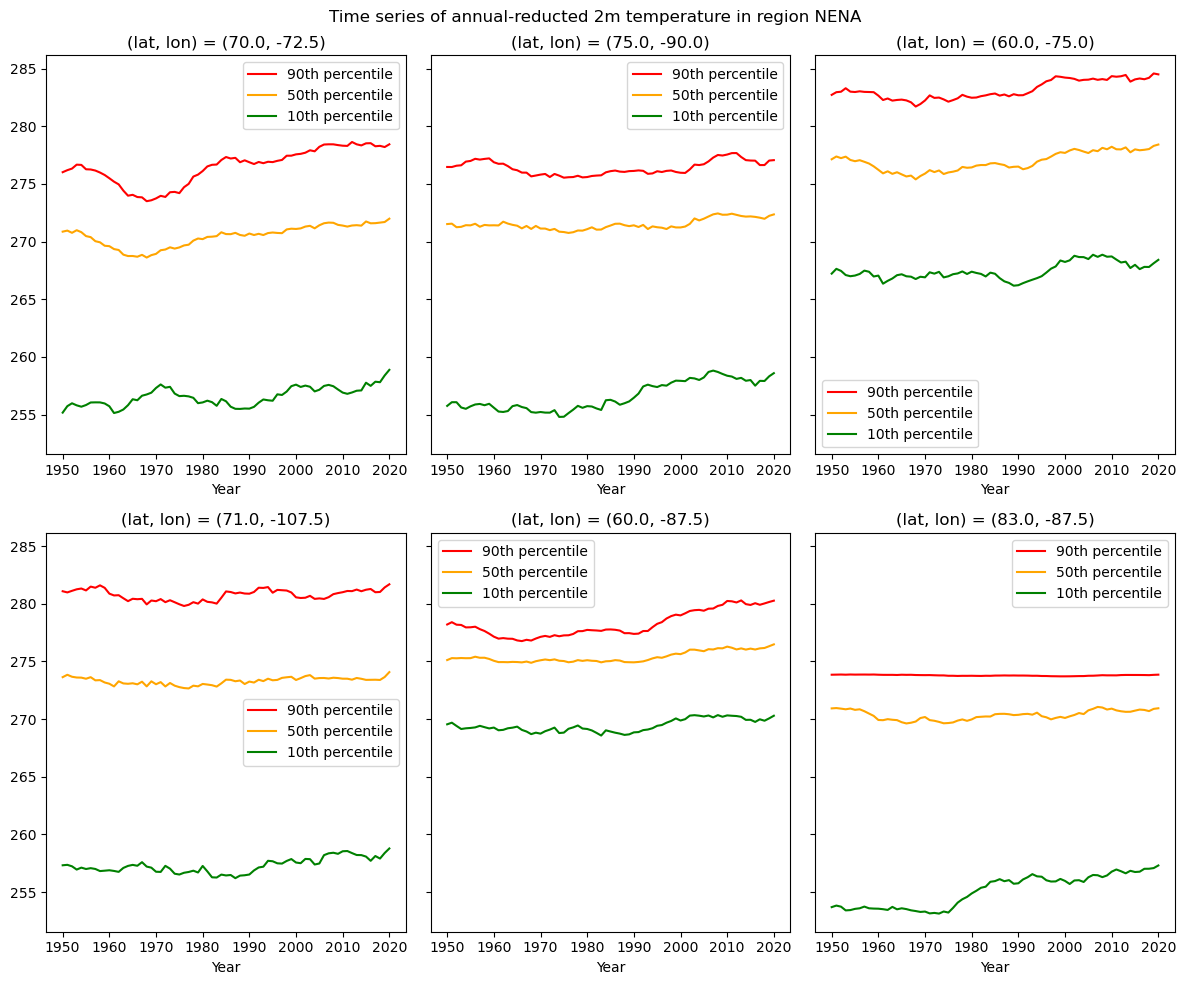

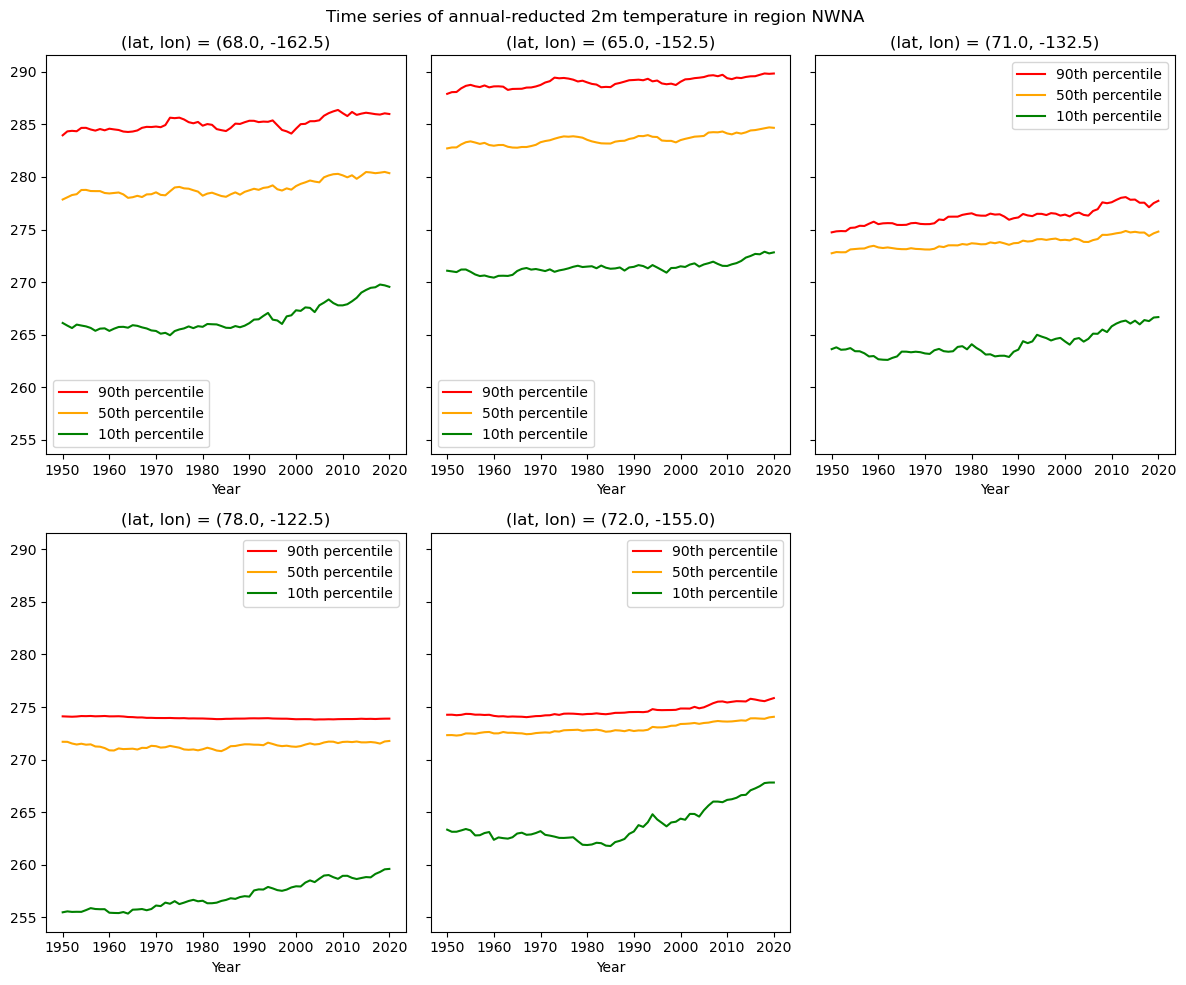

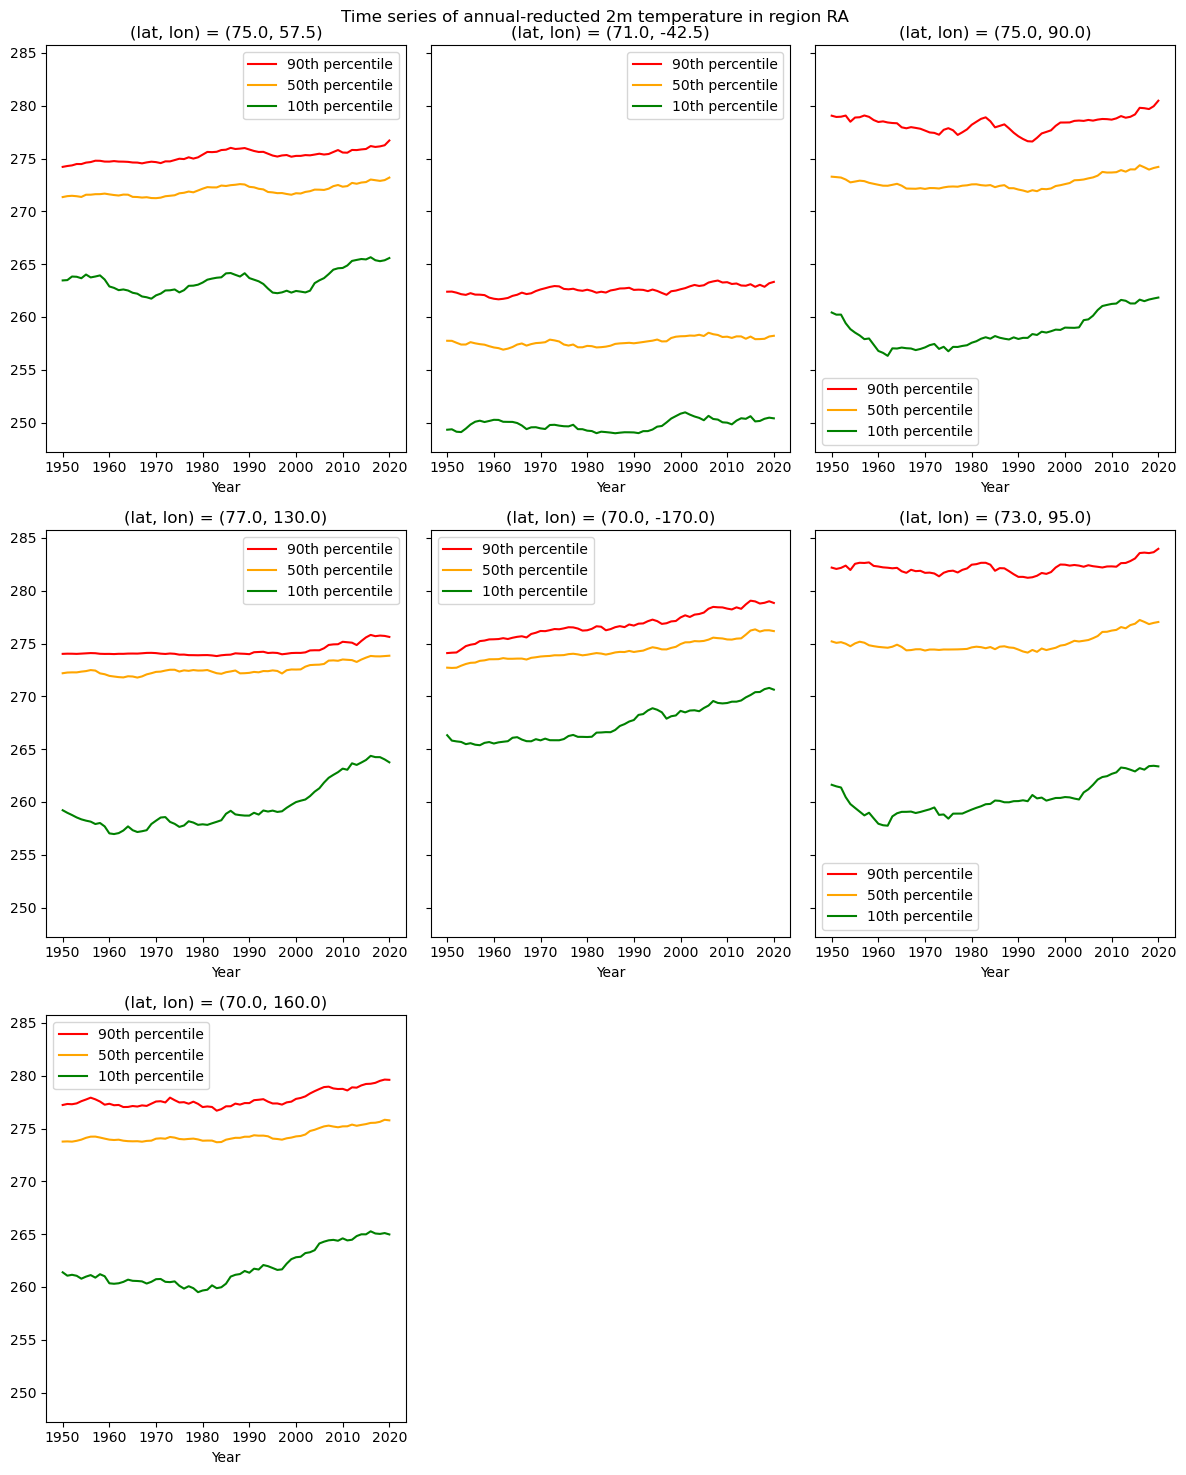

In [78]:
for region, group in rprsnttvs_groupby_region:
    
    N_points = len(group)
    N_cols = 3
    N_rows = int(np.ceil(N_points / N_cols))
    
    # if N_rows == 1, then N_rows += 1
    if N_rows == 1: N_rows += 1
    fig, ax = plt.subplots(nrows=N_rows, ncols=N_cols, sharey=True, figsize=(12, 5*N_rows))
    fig.suptitle("Time series of annual-reducted 2m temperature in region {}".format(region))
    alphas = ALPHAS[[0,2,4]]
    alpha_colors = ['red', 'orange', 'green']
    
    for point_idx in range(N_points):
        
        lat, lon = group.iloc[point_idx][['lat', 'lon']].values
        lat_idx, lon_idx = get_latlon_indices(lat, lon)
        
        row_idx = int(np.floor(point_idx / N_cols))
        col_idx = point_idx % N_cols
        ax[row_idx, col_idx].set_title("(lat, lon) = ({}, {})".format(lat, lon))
        
        for alpha_idx, alpha in enumerate(alphas):
            ts_MA_alpha = DATA_2MTEMP_ANNUAL_REDUCTION_MA[alpha_idx, :, lat_idx, lon_idx]
            ax[row_idx, col_idx].set_xlabel("Year")
            ax[row_idx, col_idx].plot(YEARS_MA, ts_MA_alpha, label="{}th percentile".format(alpha), color=alpha_colors[alpha_idx])
            ax[row_idx, col_idx].legend()
        
    # remove empty subplots
    for empty_idx in range(N_points, N_rows*N_cols):
        row_idx = int(np.floor(empty_idx / N_cols))
        col_idx = empty_idx % N_cols
        fig.delaxes(ax[row_idx, col_idx])
    
    fig.tight_layout()
    plt.show()
    fig.savefig(r"C:\SUSTech\datasets_of_graduation_project\hetero_outputs\fig_outputs\ts0a\groupby_region\{}.png".format(region), dpi=300)

## Group by place_char

In [79]:
rprsnttvs_groupby_place_char = rprsnttvs.groupby('place_char')
rprsnttvs_groupby_place_char.get_group("N").head()

,lat,lon,region,place_char
2,80.0,15.0,AO,N
11,73.0,-62.5,GI,N
12,65.0,-32.5,GI,N
14,80.0,-12.5,GI,N
16,83.0,-57.5,GI,N


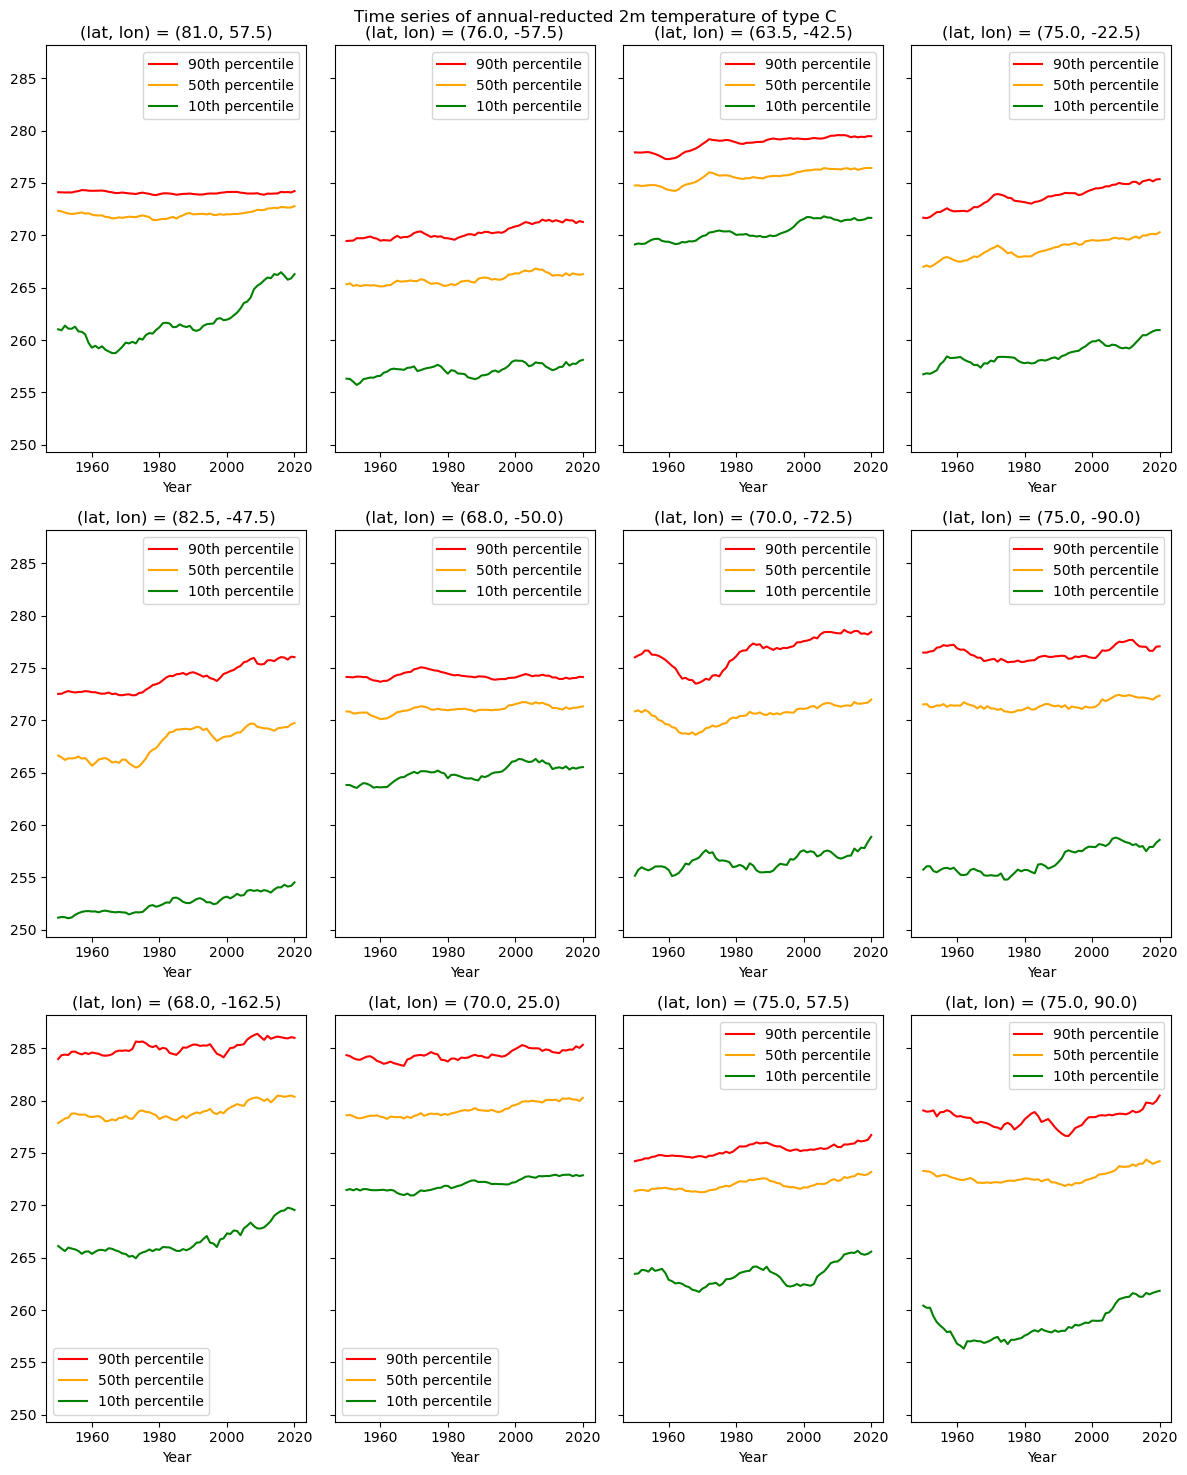

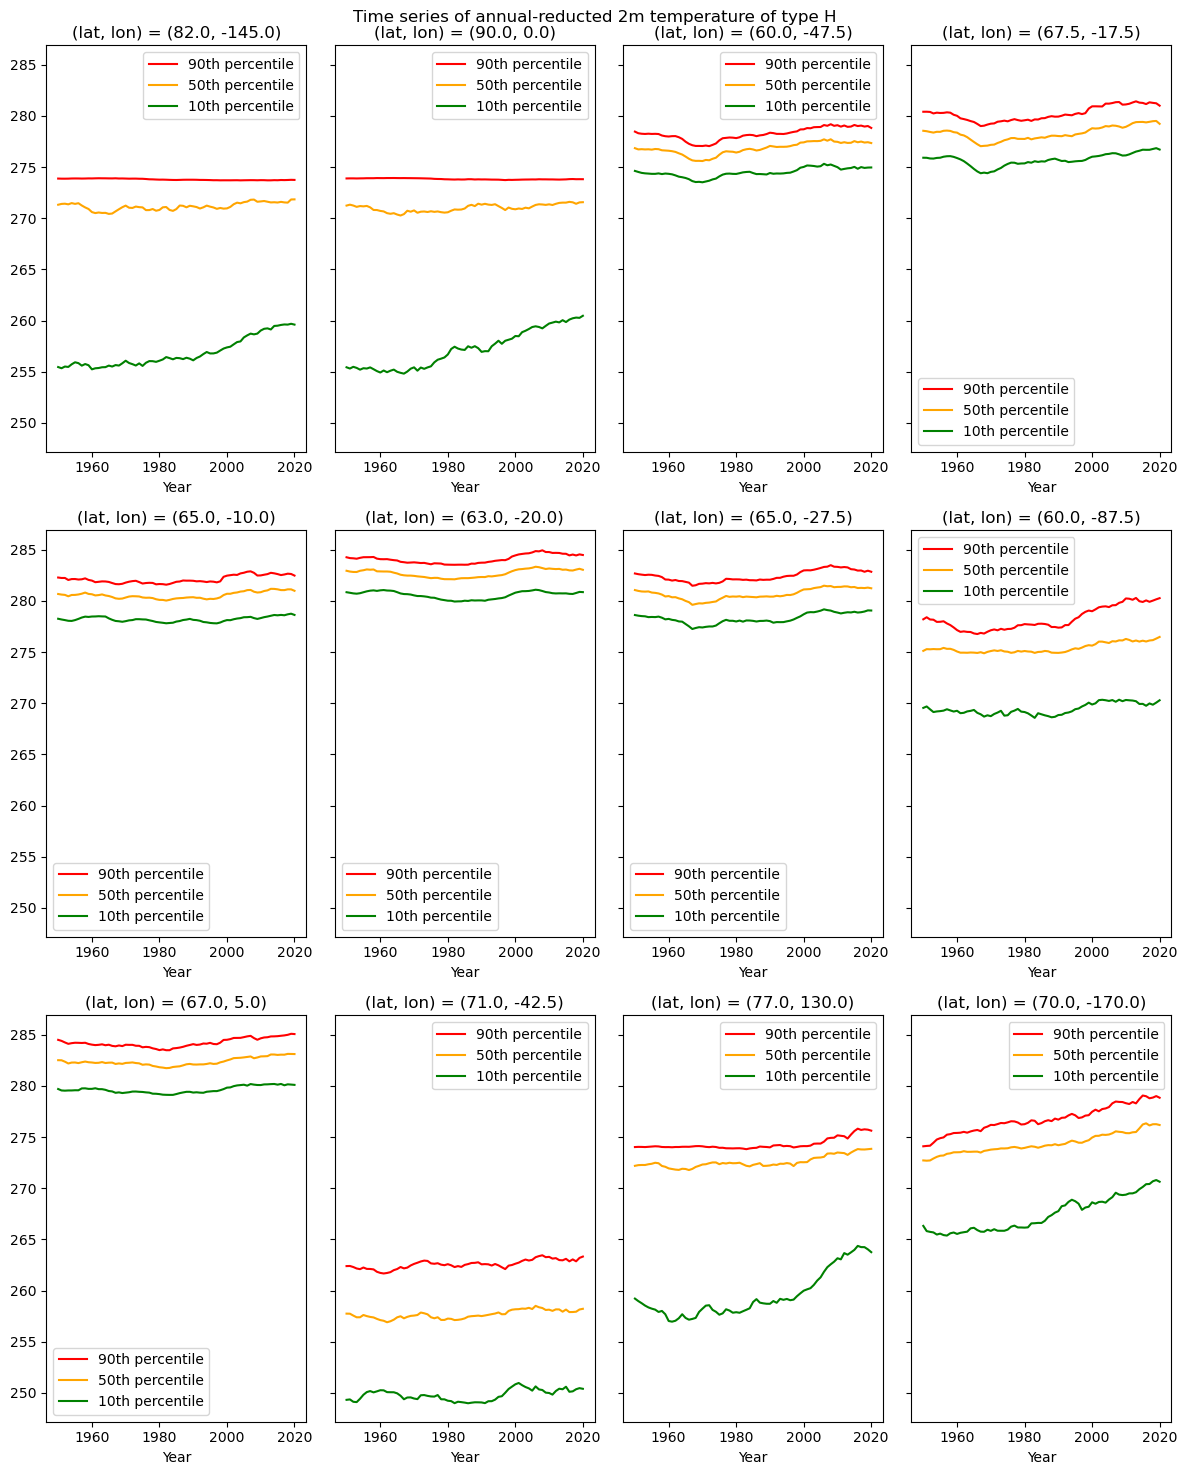

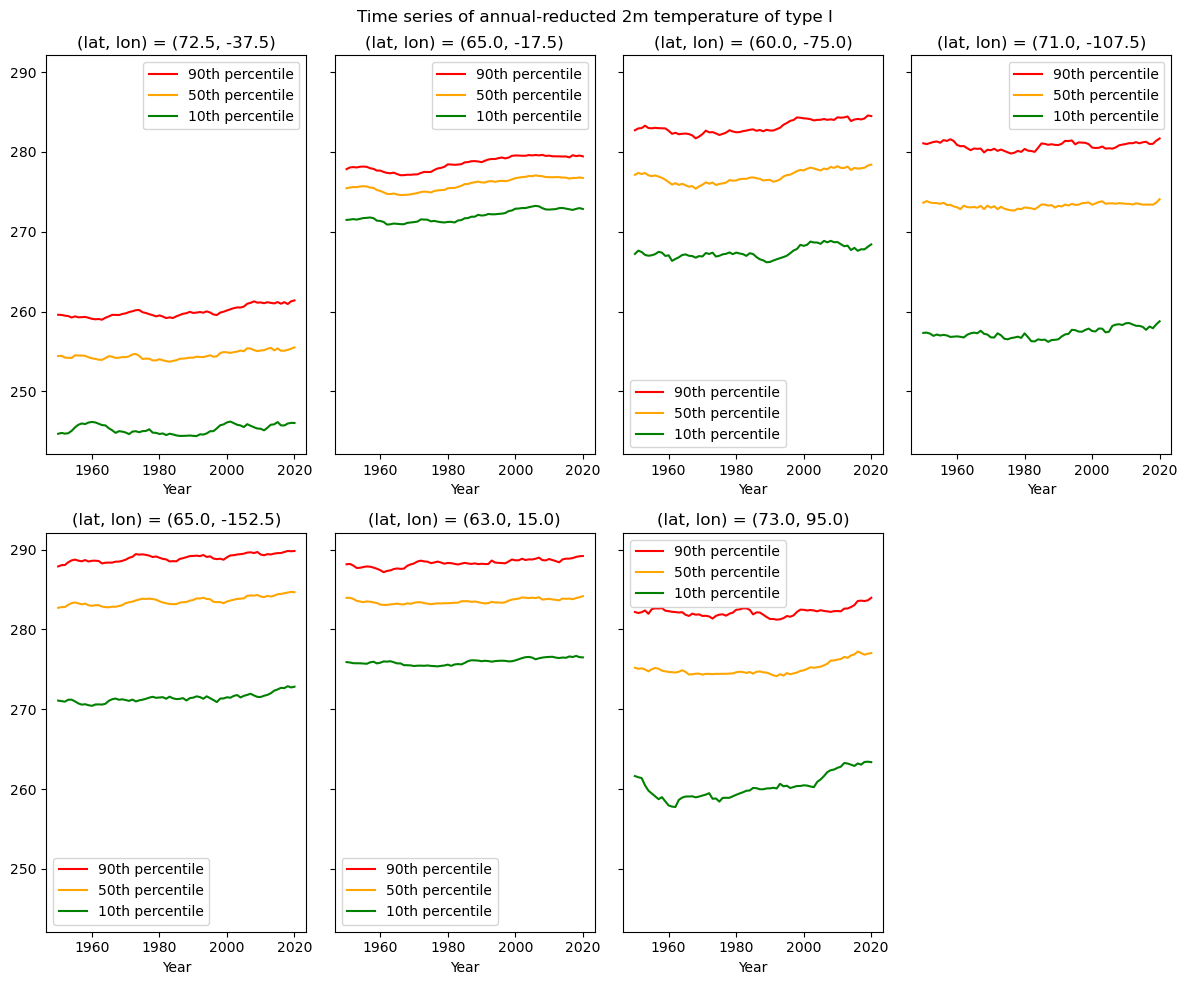

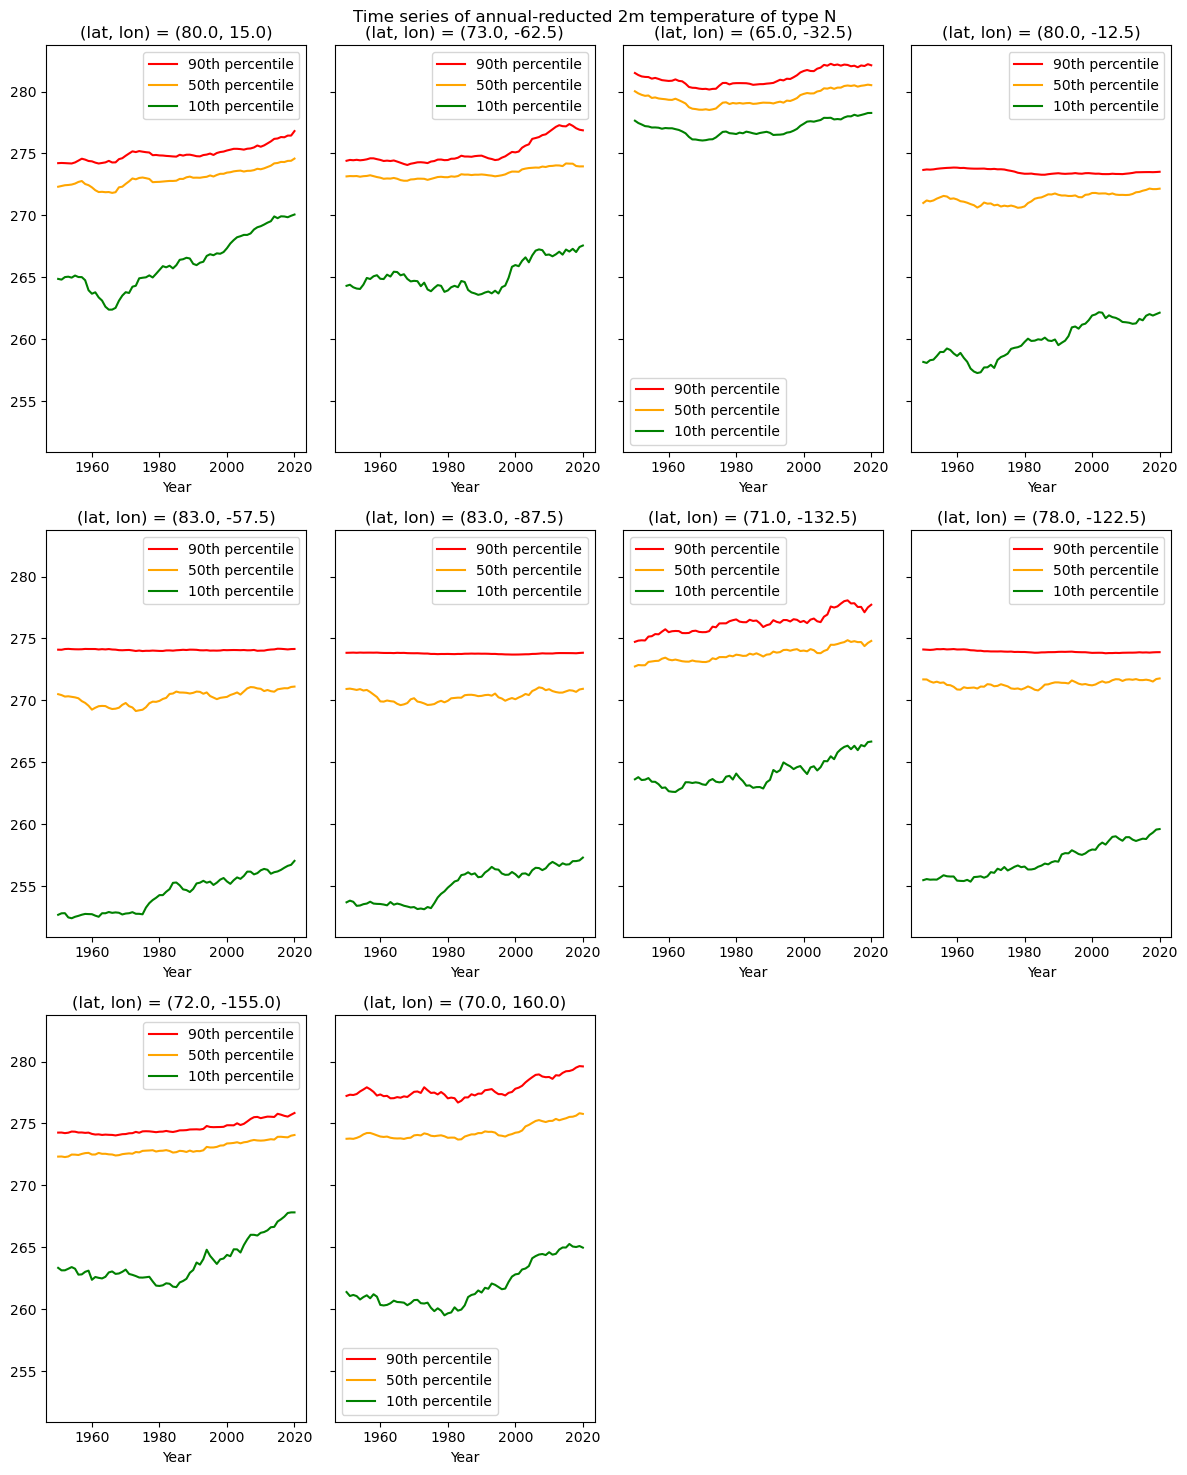

In [81]:
for place_char, group in rprsnttvs_groupby_place_char:
    
    N_points = len(group)
    N_cols = 4
    N_rows = int(np.ceil(N_points / N_cols))
    
    # if N_rows == 1, then N_rows += 1
    if N_rows == 1: N_rows += 1
    fig, ax = plt.subplots(nrows=N_rows, ncols=N_cols, sharey=True, figsize=(12, 5*N_rows))
    fig.suptitle("Time series of annual-reducted 2m temperature of type {}".format(place_char))
    alphas = ALPHAS[[0,2,4]]
    alpha_colors = ['red', 'orange', 'green']
    
    for point_idx in range(N_points):
            
            lat, lon = group.iloc[point_idx][['lat', 'lon']].values
            lat_idx, lon_idx = get_latlon_indices(lat, lon)
            
            row_idx = int(np.floor(point_idx / N_cols))
            col_idx = point_idx % N_cols
            ax[row_idx, col_idx].set_title("(lat, lon) = ({}, {})".format(lat, lon))
            
            for alpha_idx, alpha in enumerate(alphas):
                ts_MA_alpha = DATA_2MTEMP_ANNUAL_REDUCTION_MA[alpha_idx, :, lat_idx, lon_idx]
                ax[row_idx, col_idx].set_xlabel("Year")
                ax[row_idx, col_idx].plot(YEARS_MA, ts_MA_alpha, label="{}th percentile".format(alpha), color=alpha_colors[alpha_idx])
                ax[row_idx, col_idx].legend()
                
    # remove empty subplots
    for empty_idx in range(N_points, N_rows*N_cols):
        row_idx = int(np.floor(empty_idx / N_cols))
        col_idx = empty_idx % N_cols
        fig.delaxes(ax[row_idx, col_idx])
        
    fig.tight_layout()
    plt.show()
    fig.savefig(r"C:\SUSTech\datasets_of_graduation_project\hetero_outputs\fig_outputs\ts0a\groupby_place_char\{}.png".format(place_char), dpi=300)